In [1]:

import PyROA
import os
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
import os
import glob
import scienceplots
import sys
sys.path.insert(0, os.path.abspath('..'))
import rm_utils
sys.path.insert(0, os.path.abspath('../..'))
import utils
np.random.seed(2) 
torch.manual_seed(2)

In [92]:
os.getcwd()

'/Users/mattlowery/Desktop/Desko/code/astro/hetast/src/reverberation_mapping/pyroa_exps'

In [34]:
files = glob.glob('pyroa_fits/MCG+08-11-011*')
print(files)

files = glob.glob('pyroa_fits/MCG+08-11-011_*_epoch12_det')+  glob.glob('pyroa_fits/MCG+08-11-011_*_gri_seg12_10_det') 
files

['pyroa_fits/MCG+08-11-011_1_griiii_seg2_10_det', 'pyroa_fits/MCG+08-11-011_0_gri_seg1_10_det', 'pyroa_fits/MCG+08-11-011_3_gri_seg2_10_det', 'pyroa_fits/MCG+08-11-011_1_epoch2_det', 'pyroa_fits/MCG+08-11-011_1_epoch1_det', 'pyroa_fits/MCG+08-11-011_1_gri_seg1_10_det', 'pyroa_fits/MCG+08-11-011_2_gri_seg2_10_det', 'pyroa_fits/MCG+08-11-011_0_gri_seg12_10_det', 'pyroa_fits/MCG+08-11-011_2_epoch2_det', 'pyroa_fits/MCG+08-11-011_2_epoch1_det', 'pyroa_fits/MCG+08-11-011_3_gri_seg1_10_det', 'pyroa_fits/MCG+08-11-011_0_gri_seg2_10_det', 'pyroa_fits/MCG+08-11-011_2_gri_seg1_10_det', 'pyroa_fits/MCG+08-11-011_1_gri_seg2_10_det', 'pyroa_fits/MCG+08-11-011_0_epoch2_det', 'pyroa_fits/MCG+08-11-011_fit_plots', 'pyroa_fits/MCG+08-11-011_0_epoch1_det']


['pyroa_fits/MCG+08-11-011_0_gri_seg12_10_det']

In [ ]:
## files = ['pyroa_fits/NGC5548_0_epoch3_det']
files = ['pyroa_fits/MCG+08-11-011_1_gri_seg2_10_det','pyroa_fits/MCG+08-11-011_1_epoch2_det']

# files = ['pyroa_fits/MCG+08-11-011_1_gri_seg1_10_det','pyroa_fits/MCG+08-11-011_0_epoch1_det']

files = ['pyroa_fits/NGC5548_0_epoch3_det','pyroa_fits/NGC5548_1_gri_seg3_10_det']

NGC5548_2_EPOCH34_DET t1=1.3639031822544923,t2='neh',delt=10.015203592994984
0.03660245852331674 0.027608472157073294
Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      1.372  (+     0.379 -     0.341)


/var/folders/f7/kj3k_2wx32z5vc93mdwsypn00000gn/T/ipykernel_6297/2991376215.py:36: RuntimeWarning: invalid value encountered in double_scalars
  mu = np.log(mean**2/np.sqrt(mean**2 + sig**2))
/var/folders/f7/kj3k_2wx32z5vc93mdwsypn00000gn/T/ipykernel_6297/2991376215.py:37: RuntimeWarning: invalid value encountered in double_scalars
  stddev2 = np.log( 1.0+ (sig**2)/(mean**2))


Mean Delay, error:      1.079  (+     0.594 -     0.867)


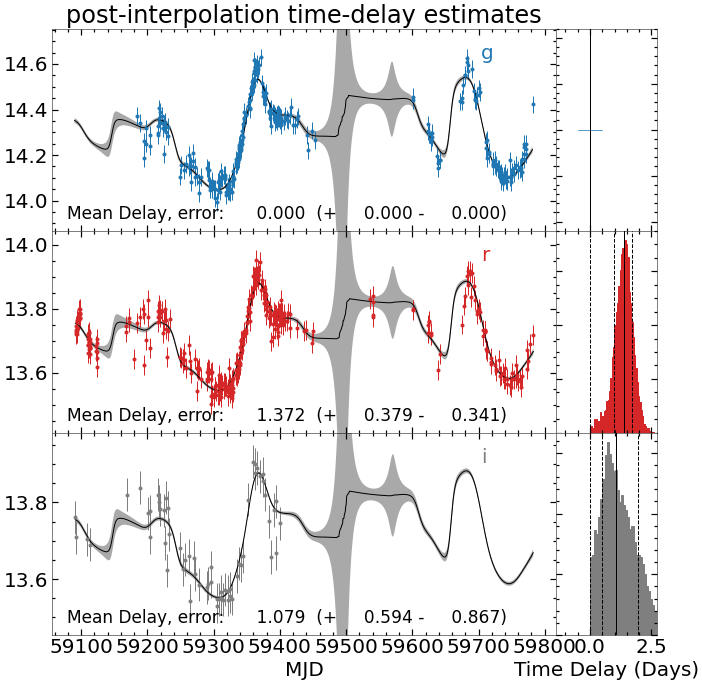

NGC5548_1_EPOCH34_DET t1=1.8197755881458388,t2='neh',delt=5.0283848232609945
0.027273230334617683 0.02237957501538795
Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      1.816  (+     0.258 -     0.253)
Mean Delay, error:      1.494  (+     0.679 -     0.721)


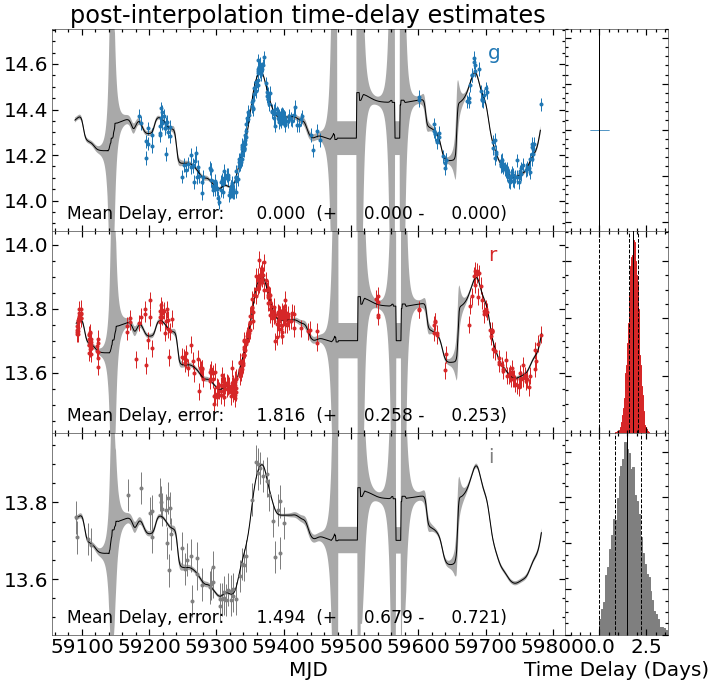

NGC5548_0_EPOCH34_DET t1=1.8037294983753065,t2='neh',delt=3.6838414012030576
0.023576824256160735 0.021222404395908775
Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      1.800  (+     0.227 -     0.224)
Mean Delay, error:      1.507  (+     0.590 -     0.647)


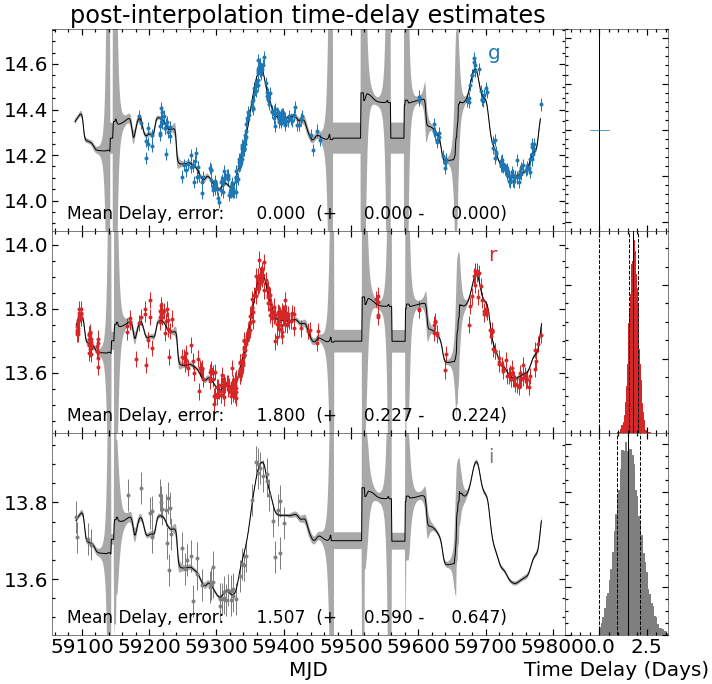

NGC5548_2_GRI_SEG34_10_DET t1=1.9465330986654306,t2='neh',delt=10.01800163896117
0.06015263737588988 0.04430126826897546
Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      1.960  (+     0.424 -     0.411)
Mean Delay, error:      0.379  (+     0.233 -     0.311)


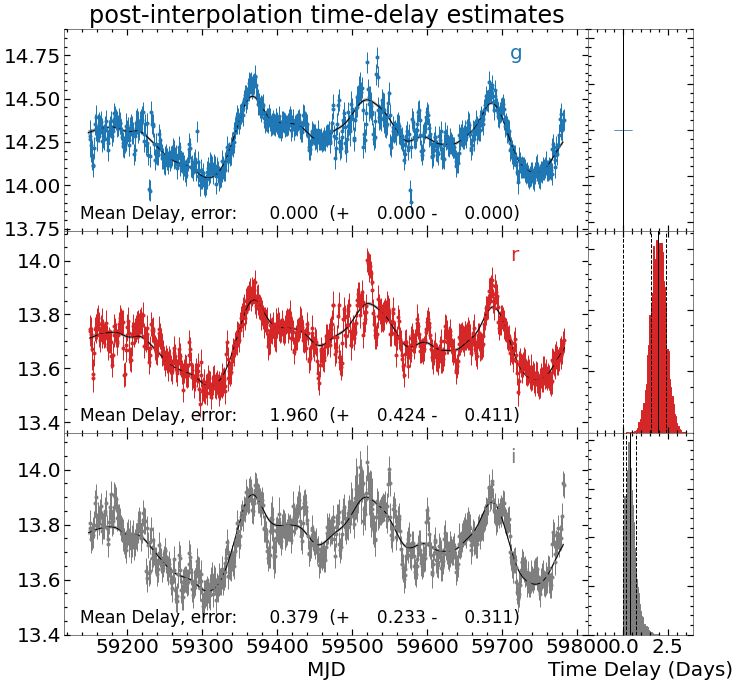

NGC5548_1_GRI_SEG34_10_DET t1=1.654680949935701,t2='neh',delt=5.037050744392467
0.05598484048428942 0.03990084846636511
Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      1.657  (+     0.280 -     0.287)
Mean Delay, error:      0.422  (+     0.185 -     0.229)


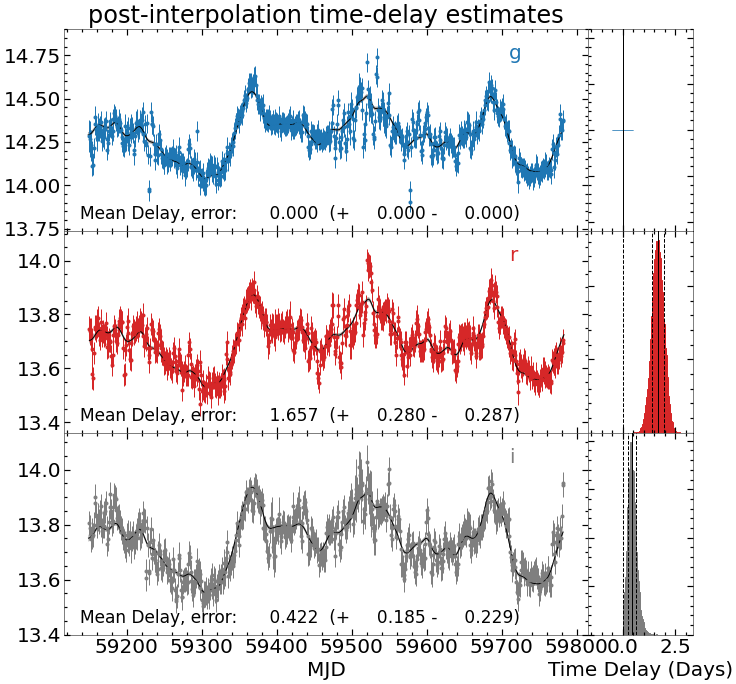

NGC5548_0_GRI_SEG34_10_DET t1=0.5508544730976932,t2='neh',delt=2.1487449411687587
0.046398605354626705 0.033492570777932044
Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      0.550  (+     0.111 -     0.121)
Mean Delay, error:      0.152  (+     0.081 -     0.097)


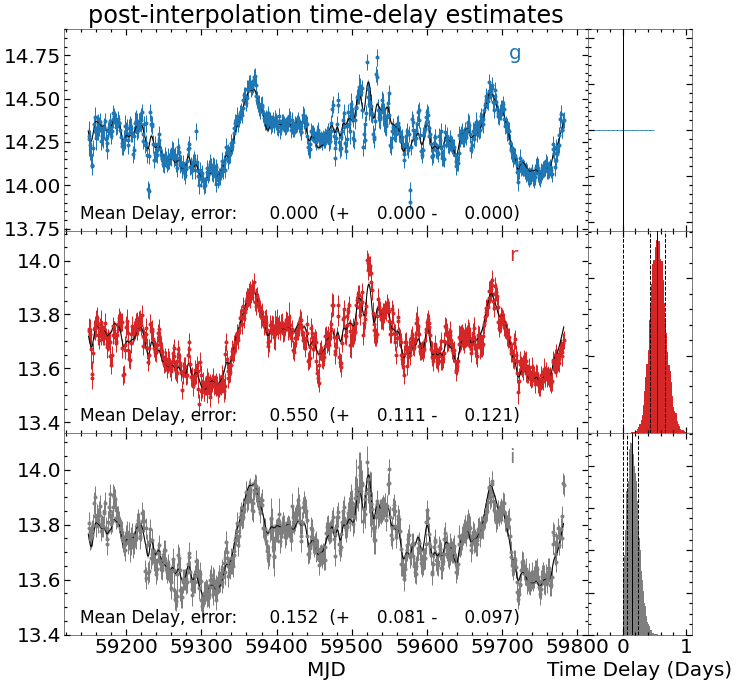

In [31]:
filters = ['g','r','i']
obj = 'NGC5548'
for file in files:
    fit = utils.load_obj(file)
    fit.datadir = os.path.join('../..',fit.datadir)
    t1 = fit.params[5]
    t2 = 'neh'
    delt = fit.params[-1]
    print(file.split('/')[-1].upper(),f'{t1=},{t2=},{delt=}')
    fit.samples_flat = fit.samples_flat[:-5000]
    
#     print(fit.params) # 2 sig 0, 7 sig 1, 12 sig 2
    print(fit.params[2],fit.params[7])
    sp = os.path.join('pyroa_fits',f'{obj}_fit_plots',file.split('/')[-1])
    ploot(fit,figsize=[10,10],save_file='')
    
    
    

In [80]:
filters=['g','r','i']

inc_window_priors = [[0.0, 20.0], [-10, 30.0], [-50.0, 50.0], [5,15], [0.0, 10.0]]
psi_types = ['Gaussian','Gaussian']
fit16 = PyROA.Fit('../../notebooks/intrps/MCG+08-11-011/gri_seg2_10_det/', 'MCG+08-11-011',filters,inc_window_priors, Nburnin=20000,Nsamples=50000, delay_dist=True, add_var=True, psi_types=psi_types,init_delta=10)



Initial Parameter Values
      A0       B0    σ0        A1       B1    τ1    Δ1    σ1        A2        B2    τ2    Δ2    σ2    Δ
--------  -------  ----  --------  -------  ----  ----  ----  --------  --------  ----  ----  ----  ---
0.223446  14.9041  0.01  0.159801  14.1737     1     1  0.01  0.586378  0.277237     1     1  0.01   10
NWalkers=32


Process SpawnPoolWorker-11:


KeyboardInterrupt: 

/var/folders/f7/kj3k_2wx32z5vc93mdwsypn00000gn/T/ipykernel_85418/2796858154.py:32: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-0.5*((t-mean)/sig)**2)


Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      0.951  (+     0.289 -     0.284)
Mean Delay, error:      0.484  (+     0.309 -     0.392)


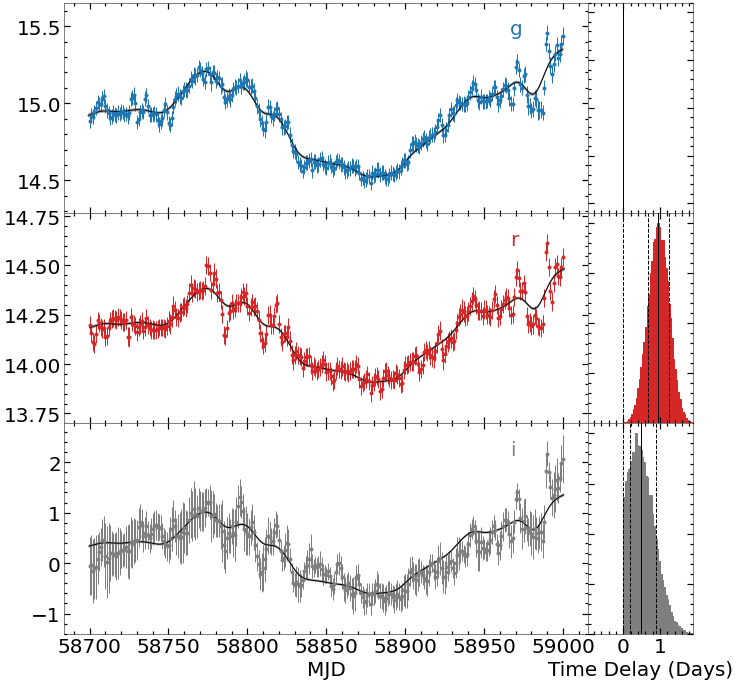

In [64]:
ploot(fit16,figsize=[10,10],save_file='pyroa_fits//MCG+08-11-011_fit_plots/MCG+08-11-011_1_griiii_seg2_10_det')

In [60]:
save_fn = 'MCG+08-11-011_1_griiii_seg2_10_det'
with open(f'pyroa_fits/{save_fn}', 'wb') as f:
            pickle.dump(fit16, f, pickle.HIGHEST_PROTOCOL)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import interpolate
import emcee
from tqdm import tqdm
from multiprocessing import Pool
from itertools import chain
from tabulate import tabulate
import corner
from astropy.modeling import models
import os
import pickle
import numba
from numba import jit
from numba import prange
from numba.typed import List
from numba import generated_jit, types
from scipy import special
import scipy.special
import matplotlib
from astropy.modeling import models
from scipy import signal
from scipy.ndimage import gaussian_filter1d
from scipy.integrate import quad
import csv
from pandas import DataFrame

def Gaussian(mean, sig, t, conv):
    if (conv==True):
        mean = 0.0
    return np.exp(-0.5*((t-mean)/sig)**2)

def LogGaussian(mean, sig, t, min_delay, conv):
    mean = mean - min_delay # set zero point to min delay    
    mu = np.log(mean**2/np.sqrt(mean**2 + sig**2))
    stddev2 = np.log( 1.0+ (sig**2)/(mean**2))

    if (conv == True):
        t = t + mean # Shift time grid to centre on mean
        psi = np.zeros(len(t))
        ts = t[t>0]
        psi[t>0] = (1.0/(ts*np.sqrt(stddev2 *2.0*np.pi)))*np.exp(- 0.5 * (np.log(ts) - mu) ** 2 / stddev2)
    else:
        try:
            t_shift = t - min_delay   
            psi = np.zeros(len(t_shift))
            ts = t_shift[t_shift>0]
            psi[t_shift>0] = (1.0/(ts*np.sqrt(stddev2 *2.0*np.pi)))*np.exp(- 0.5 * (np.log(ts) - mu) ** 2 / stddev2)
        except:
            psi = np.zeros(len(mu))        
            for i in range(len(min_delay)):
                t_shift = t - min_delay[i]
                if (t_shift > 0):
                    psi[i] = (1.0/(t_shift*np.sqrt(stddev2[i] *2.0*np.pi)))*np.exp(- 0.5 * (np.log(t_shift) - mu[i]) ** 2 / stddev2[i])
                else:
                    psi[i]=0.0
    return psi

def ploot(Fit,figsize=[15,20],save_file=''):

    plt.style.use(['science','no-latex'])        
    plt.rcParams.update({
            "font.family": "Sans", 
            "font.serif": ["DejaVu"],
            "figure.figsize":figsize,
            "font.size": 20,
            "xtick.major.size" : 6,
            "xtick.major.width": 1.2,
            "xtick.minor.size" : 3,
            "xtick.minor.width" : 1.2,
            "ytick.major.size" : 6,
            "ytick.major.width": 1.2,
            "ytick.minor.size" : 3,
            "ytick.minor.width" : 1.2}) 



    datadir =Fit.datadir
    objName = Fit.objName
#     filters=Fit.filters
    data=[]
    for i in range(len(filters)):
        file = datadir + str(objName) +"_"+ str(filters[i]) + ".dat"
        data.append(np.loadtxt(file))


    cmap = matplotlib.cm.get_cmap('tab10')
    band_colors=[]
    n = np.arange(0.05, 1.0 + 0.5/len(filters), 1.0/len(filters))
    for i in range(len(filters)):
        band_colors.append(cmap(n[i]))

    samples_flat = Fit.samples_flat
    t = Fit.t
    X=Fit.X
    errs= Fit.X_errs
    
    
    transpose_samples = np.transpose(samples_flat)      
    

        

    Nchunk = 2
    if (Fit.AccDisc == False):
        Nchunk+=1
       
        
    
    if (Fit.add_var == True):
        Nchunk +=1
    if (Fit.delay_dist == True and Fit.AccDisc == False):
        Nchunk+=1
        
        if (Fit.delay_ref_pos == 0):
            transpose_samples=np.insert(transpose_samples, [2], np.array([0.0]*len(transpose_samples[1])), axis=0)              #Insert zero for reference delay dist
        else:
            transpose_samples=np.insert(transpose_samples, [3], np.array([0.0]*len(transpose_samples[1])), axis=0)              #Insert zero for reference delay dist
        
        
        param_delete=2
    else:
        param_delete=1
        

                 
    Npar =  Nchunk*len(data) + 1
    if (Fit.AccDisc == True):
        Npar =  Nchunk*len(data) + 3
        
    pos = Fit.delay_ref_pos*Nchunk + 2
    if (Fit.AccDisc == False):
        transpose_samples= np.insert(transpose_samples, pos, np.array([0.0]*len(transpose_samples[1])), axis=0)    #Insert zero for reference delay 

    

    chunk_size = Nchunk#int((Npar - 1)/len(data))

           
    samples_chunks = [transpose_samples[i:i + chunk_size] for i in range(0, len(transpose_samples), chunk_size)]
    
    
    
    
            
    if (Fit.AccDisc == True):
        T1 = np.percentile(samples_chunks[-1][0], [16, 50, 84])[1]
        b = np.percentile(samples_chunks[-1][1], [16, 50, 84])[1]        
                #Integral and interpolate
        Is=[]
        bs = np.linspace(0.34, 10.0, 5000)
        for i in range(len(bs)):
            Is.append(quad(integrand, 0, np.inf, args=(bs[i]))[0])
        integral= interpolate.interp1d(bs, Is, kind="linear", fill_value="extrapolate")
        Is=[]
        bs = np.linspace(0.34, 10.0, 5000)
        for i in range(len(bs)):
            Is.append(quad(integrand2, 0, np.inf, args=(bs[i]))[0])
        integral2= interpolate.interp1d(bs, Is, kind="linear", fill_value="extrapolate")
        
        
    fig = plt.figure(100)
    gs = fig.add_gridspec(len(filters), 2, hspace=0, wspace=0, width_ratios=[5, 1])
    axs= gs.subplots(sharex='col') 
    tss=[]    
    for j in range(len(filters)):

        #Read in parameter values
        A = np.percentile(samples_chunks[j][0], [16, 50, 84])[1]
        B = np.percentile(samples_chunks[j][1], [16, 50, 84])[1]
        if (Fit.AccDisc == False):
            tau = np.percentile(samples_chunks[j][2], [16, 50, 84])[1]
            tau_samples=samples_chunks[j][2]
            if (Fit.delay_dist == True):
                tau_rms = np.percentile(samples_chunks[j][3], [16, 50, 84])[1]
        else:
            l_0 = Fit.wavelengths[0]
            l = Fit.wavelengths[j] - l_0        
            l_delay_ref = Fit.wavelengths[Fit.delay_ref_pos] - l_0
            tau_0 = (l_0*1e-10*1.3806e-23*T1/(6.63e-34*3e8))**(1.0/b)
            tau = tau_0*((l/l_0)**(1.0/b))*8.0*(np.pi**4)/(15.0*integral(b)) - tau_0*((l_delay_ref/l_0)**(1.0/b))*8.0*(np.pi**4)/(15.0*integral(b)) #Measure mean from delay reference
            tau_rms = np.sqrt((tau_0**2)*((l/l_0)**(2.0/b))*integral2(b)/integral(b))
            
            if (j==0):
                min_delay = tau
            
            tau_samples = (l_0*1e-10*1.3806e-23*samples_chunks[-1][0]/(6.63e-34*3e8))**(1.0/samples_chunks[-1][1])*((l/l_0)**(1.0/samples_chunks[-1][1]))*8.0*(np.pi**4)/(15.0*integral(samples_chunks[-1][1])) - (l_0*1e-10*1.3806e-23*samples_chunks[-1][0]/(6.63e-34*3e8))**(1.0/samples_chunks[-1][1])*((l_delay_ref/l_0)**(1.0/samples_chunks[-1][1]))*8.0*(np.pi**4)/(15.0*integral(samples_chunks[-1][1]))
        tss.append(tau)

        
        mjd = data[j][:,0]
        flux = data[j][:,1]
        err = data[j][:,2] 
        
        
        #Add extra variance
        if (Fit.add_var == True):
            sig = np.percentile(samples_chunks[j][-1], [16, 50, 84])[1]  
            err = np.sqrt(err**2 + sig**2)
        
        ts, model, errs = Fit.models[j]
        
        
        axs[0][0].set_title('post-interpolation time-delay estimates')

        axs[j][0].errorbar(mjd, flux , yerr=err, ls='none', marker=".", color=band_colors[j])
        axs[j][0].plot(ts, model, color="black")
        axs[j][0].fill_between(ts , model+errs,  model-errs, facecolor="darkgrey", edgecolor='none', rasterized=True, antialiased=True)
        
        if (Fit.include_slow_comp == True):
            slow_comp = Fit.slow_comps[j]
            axs[j][0].plot(t, slow_comp(t)+B, linestyle="dashed", color="black")          
        
        length=abs(max(flux)-min(flux))
        axs[j][0].set_ylim(min(flux)-0.2*length, max(flux)+0.2*length)
        axs[j][0].set_xlabel("MJD")
        
        axs[j][0].annotate(filters[j], xy=(0.85, 0.85), xycoords='axes fraction', color=band_colors[j], fontsize=20) 
        
        
        
      #  if (i>0 and i!=Fit.delay_ref_pos):
         #   smpls = peaktomean(samples_chunks[j][2], samples_chunks[0][2], samples_chunks[j][3])
       # else:
        smpls = tau_samples
        if (Fit.psi_types[j] == "TruncGaussian" and Fit.AccDisc == False):
            smpls = peaktomean(samples_chunks[j][2], samples_chunks[0][2], samples_chunks[j][3])
        
        frq, edges = np.histogram(smpls, bins=50)        
        if (Fit.delay_dist==True or Fit.AccDisc == True):
            
            
            # Transfer Function
            if (Fit.psi_types[j] == "Gaussian"and Fit.AccDisc == False):
                psi = Gaussian(tau, tau_rms, np.linspace(-4.0*tau_rms, 4.0*tau_rms, 200), conv = False)
            elif(Fit.psi_types[j] ==  "Uniform"and Fit.AccDisc == False):
                psi = Uniform(tau, tau_rms, np.linspace(-4.0*tau_rms, 4.0*tau_rms, 200), conv = False) 
            elif(Fit.psi_types[j] ==  "TruncGaussian"and Fit.AccDisc == False):
                psi = TruncGaussian(tau, tau_rms, np.linspace(-4.0*tau_rms, 4.0*tau_rms, 200), np.percentile(samples_chunks[0][2], [16, 50, 84])[1], conv = True) 
            elif(Fit.psi_types[j] == "LogGaussian"and Fit.AccDisc == False):
                psi = LogGaussian(tau, tau_rms, np.linspace(tau-4.0*tau_rms,tau+ 4.0*tau_rms, 200), np.percentile(samples_chunks[0][2], [16, 50, 84])[1], conv=False)
            elif(Fit.psi_types[j] == "InverseGaussian"and Fit.AccDisc == False):
                psi = InverseGaussian(tau, tau_rms, np.linspace(tau-4.0*tau_rms,tau+ 4.0*tau_rms, 200), np.percentile(samples_chunks[0][2], [16, 50, 84])[1], conv=False)    
            elif (Fit.AccDisc == True):
                if (j>0):
                    psi = AccDisc(Fit.wavelengths[0], Fit.wavelengths[j] - Fit.wavelengths[0], T1, b, integral, np.linspace(tau-4.0*tau_rms,tau+ 4.0*tau_rms, 200), min_delay,conv = False)
                else:
                    psi = np.ones(200)
                
                        
                
            norm = np.max(psi)
            norm = norm/max(frq)
            if (Fit.delay_ref_pos>0 and j==0 and Fit.AccDisc == False):
                norm = 1.0
            
        else:
            norm=1.0/max(frq)

        
                
        

        axs[j][1].bar(edges[:-1], frq*norm, width=np.diff(edges), edgecolor=band_colors[j], align="edge", color=band_colors[j])  
        #axs[j][1].hist(tau_samples, color=band_colors[j], bins=50, density=True)
        axs[j][1].axvline(x = np.percentile(smpls, [16, 50, 84])[1], color="black")
        mean_delay = np.percentile(smpls, [16, 50, 84])
        print('Mean Delay, error: %10.3f  (+%10.3f -%10.3f)'%(mean_delay[1], mean_delay[1] - mean_delay[0], mean_delay[2] - mean_delay[1]))
        axs[j][0].annotate('Mean Delay, error: %10.3f  (+%10.3f -%10.3f)'%(mean_delay[1], mean_delay[1] - mean_delay[0], mean_delay[2] - mean_delay[1]),fontsize=17,xy=(0.03, 0.06),
                           xycoords='axes fraction',)
        axs[j][1].axvline(x = np.percentile(smpls, [16, 50, 84])[0] , color="black", ls="--")
        axs[j][1].axvline(x = np.percentile(smpls, [16, 50, 84])[2], color="black",ls="--")
        axs[j][1].axvline(x = 0, color="black",ls="--")    
        axs[j][1].set_xlabel("Time Delay (Days)")

        if (Fit.delay_dist==True or Fit.AccDisc == True):
            if (j>0 and Fit.AccDisc == False):

                tau_rms = np.percentile(samples_chunks[j][3], [16, 50, 84])
            
                length=10.0*tau_rms[1]
                taus=np.arange(tau - 5.0*tau_rms[1], tau + 5.0*tau_rms[1], length/500)
                if(Fit.psi_types[j] == "LogGaussian" or Fit.psi_types[j] == "InverseGaussian"):
                    taus=np.linspace(tss[0]-tau_rms[1], np.percentile(samples_chunks[-2][2], [16, 50, 84])[1] + 5.0*tau_rms[1]  , 600)
            
                #Limits for errors
                up=[]
                low=[]
                Gs = []
                for k in range(len(taus)):
                    rms_samples = samples_chunks[j][3]
                    mean_samples = samples_chunks[j][2]

                    # Transfer Function
                    if (Fit.psi_types[j] == "Gaussian"and Fit.AccDisc == False):
                        psi = Gaussian(mean_samples, rms_samples, taus[k], conv = False)
                    elif(Fit.psi_types[j] ==  "Uniform"and Fit.AccDisc == False):
                        psi = Uniform(mean_samples, rms_samples, taus[k], conv = False)
                    elif(Fit.psi_types[j] ==  "TruncGaussian"and Fit.AccDisc == False):  
                        psi = TruncGaussian(mean_samples, rms_samples, taus[k], samples_chunks[0][2], conv = False)  
                    elif(Fit.psi_types[j] == "LogGaussian"and Fit.AccDisc == False):
                        psi = LogGaussian(mean_samples, rms_samples, taus[k], samples_chunks[0][2], conv = False)   
                    elif(Fit.psi_types[j] == "InverseGauss"and Fit.AccDisc == False):
                        psi = InverseGaussian(mean_samples, rms_samples, taus[k], samples_chunks[0][2], conv = False)       
                    elif (Fit.AccDisc == True):
                        psi = AccDisc(l_0, l, samples_chunks[-1][0], samples_chunks[-1][1], integral, taus[k], min_delay, conv = False)
                     
                    percent =  np.percentile(psi, [16, 50, 84])
                    up.append(percent[0])
                    Gs.append(percent[1])
                    low.append(percent[2])

#                 axs[j][1].plot( taus, Gs, color="black", lw=1.5)                    
                
#                 axs[j][1].fill_between(taus, up, low, color="black", alpha=0.5, edgecolor='none', rasterized=True, antialiased=True)
                


    length = max(tss)-min(tss)        
    axs[-1][1].set_xlim(min(tss)-1.0*length, max(tss)+1.0*length)
            
            
            
            
            
            
            
        
    for ax in axs.flat:
        ax.label_outer()    
    
    plt.tight_layout() 
    if save_file: plt.savefig(save_file)
    plt.show() 
    
